**IMPORT DATA**

In [1]:
import lasio
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ganti 'path_to_file.las' dengan path file LAS yang ingin diimpor
file_path = 'ADWL-2.las'

# Membaca file LAS
las = lasio.read(file_path)

# Mengubah data LAS menjadi DataFrame
df = las.df()
df.reset_index(inplace=True)

**DISPLAY DATA**

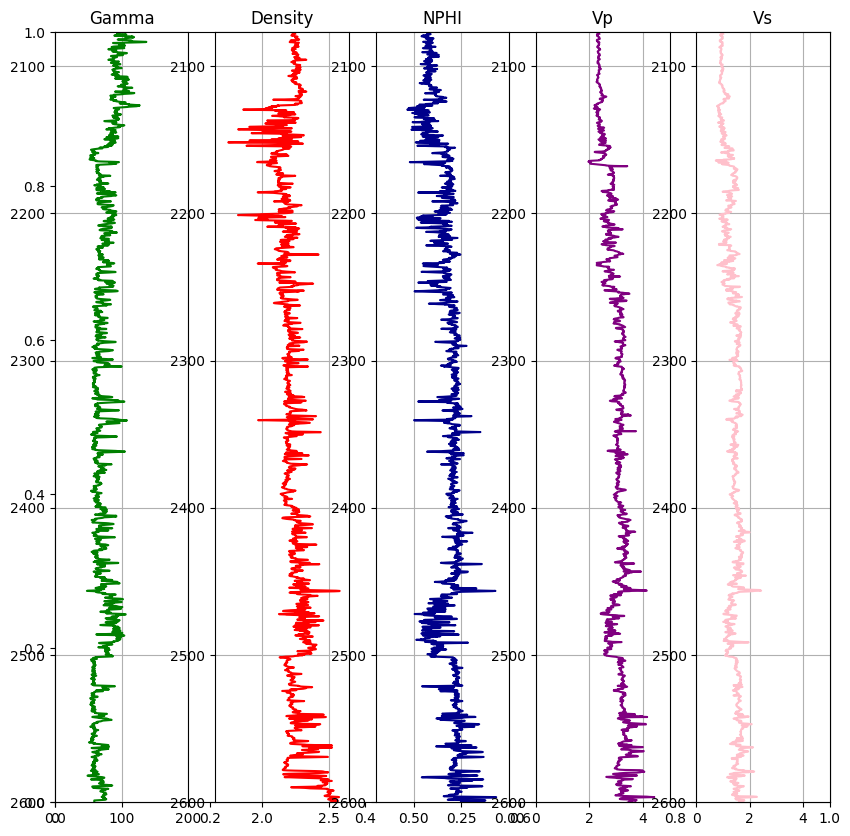

In [28]:
fig = plt.subplots(figsize=(10,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,5), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,5), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,5), (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,5), (0,3), rowspan=1, colspan = 1)
ax5 = plt.subplot2grid((1,5), (0,4), rowspan=1, colspan = 1)

ax1.plot("GR", "DEPTH", data = df, color = "green") # Call the data from the well dataframe
ax1.set_title("Gamma") # Assign a track title
ax1.set_xlim(0, 200) # Change the limits for the curve being plotted
ax1.set_ylim(2600, 2077) # Set the depth range
ax1.grid() # Display the grid

ax2.plot("RHOB", "DEPTH", data = df, color = "red")
ax2.set_title("Density")
ax2.set_xlim(1.65, 2.65)
ax2.set_ylim(2600, 2077)
ax2.grid()

ax3.plot("NPHI", "DEPTH", data = df, color = "darkblue")
ax3.set_title("NPHI")
ax3.set_xlim(0.7, 0)
ax3.set_ylim(2600, 2077)
ax3.grid()

ax4.plot("VP", "DEPTH", data = df, color = "purple")
ax4.set_title("Vp")
ax4.set_xlim(0, 5)
ax4.set_ylim(2600, 2077)
ax4.grid()

ax5.plot("VS", "DEPTH", data = df, color = "pink")
ax5.set_title("Vs")
ax5.set_xlim(0, 5)
ax5.set_ylim(2600, 2077)
ax5.grid()

**Vshale Calculation**

In [3]:
GRmax = df['GR'].max()
GRmin = df['GR'].min()

# Lakukan perhitungan clay content menggunakan .loc untuk menghindari SettingWithCopyWarning
df.loc[:, 'Vshale'] = (GRmax - df['GR']) / (GRmax - GRmin)

In [4]:
df.loc[:, 'Vclay'] = (df['Vshale'] * 0.7)

**Vp/Vs Calculation**

In [5]:
df['Vp/Vs'] = df['VP']/df['VS']

**Quantitative Analysis**

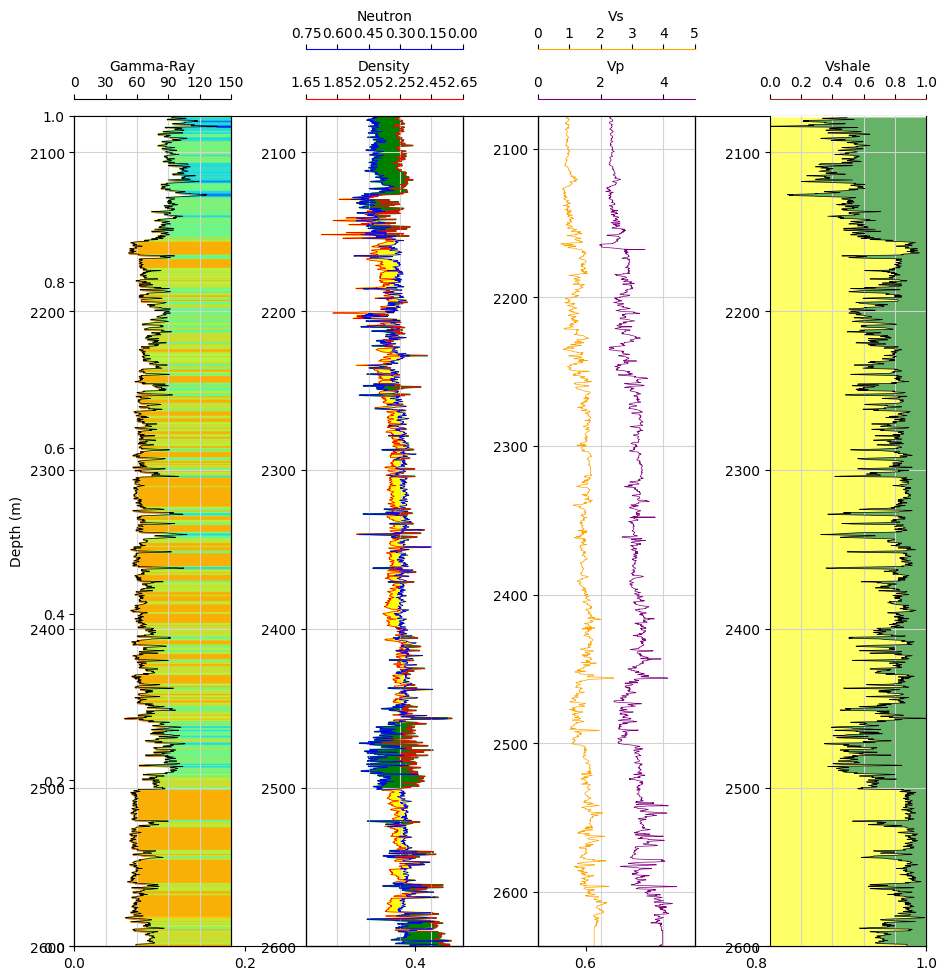

In [6]:
fig, ax = plt.subplots(figsize=(10,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,4), (0,2), rowspan=1, colspan = 1)
ax4 = ax2.twiny() #Twins the y-axis for the density track with the neutron track
ax5 = ax3.twiny()
ax6 = plt.subplot2grid((1,4), (0,3), rowspan=1, colspan = 1)

# As our curve scales will be detached from the top of the track,
# this code adds the top border back in without dealing with splines
ax7 = ax1.twiny()
ax7.xaxis.set_visible(False)
ax8 = ax2.twiny()
ax8.xaxis.set_visible(False)
ax9 = ax3.twiny()
ax9.xaxis.set_visible(False)

# Gamma Ray track
ax1.plot("GR", "DEPTH", data = df, color = "black", linewidth=0.5)
ax1.set_xlabel("Gamma-Ray")
ax1.xaxis.label.set_color("black")
ax1.set_xlim(0, 150)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="black")
ax1.spines["top"].set_edgecolor("black")
ax1.title.set_color('black')
ax1.set_xticks([0, 30, 60, 90, 120, 150])

# Density track
ax2.plot("RHOB", "DEPTH", data = df, color = "red", linewidth=0.5)
ax2.set_xlabel("Density")
ax2.set_xlim(1.65, 2.65)
ax2.xaxis.label.set_color("black")
ax2.tick_params(axis='x', colors="black")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([1.65, 1.85, 2.05, 2.25, 2.45, 2.65])

# Sonic track
ax3.plot("VP", "DEPTH", data = df, color = "purple", linewidth=0.5)
ax3.set_xlabel("Vp")
ax3.set_xlim(0, 5)
ax3.xaxis.label.set_color("black")
ax3.tick_params(axis='x', colors="black")
ax3.spines["top"].set_edgecolor("purple")

# Neutron track placed ontop of density track
ax4.plot("NPHI", "DEPTH", data = df, color = "blue", linewidth=0.5)
ax4.set_xlabel('Neutron')
ax4.xaxis.label.set_color("black")
ax4.set_xlim(0.6, 0.0)
ax4.set_ylim(2636.568800, 2078.022700)
ax4.tick_params(axis='x', colors="black")
ax4.spines["top"].set_position(("axes", 1.08))
ax4.spines["top"].set_visible(True)
ax4.spines["top"].set_edgecolor("blue")
ax4.set_xticks([0.75, 0.6, 0.45, 0.30, 0.15, 0])

# Neutron track placed ontop of density track
ax5.plot("VS", "DEPTH", data = df, color = "orange", linewidth=0.5)
ax5.set_xlabel('Vs')
ax5.xaxis.label.set_color("black")
ax5.set_xlim(0, 5)
ax5.set_ylim(2636.568800, 2078.022700)
ax5.tick_params(axis='x', colors="black")
ax5.spines["top"].set_position(("axes", 1.08))
ax5.spines["top"].set_visible(True)
ax5.spines["top"].set_edgecolor("orange")
ax5.set_xticks([0, 1, 2, 3, 4, 5])

ax6.plot("Vshale", "DEPTH", data = df, color = "black", linewidth=0.5)
ax6.set_xlabel("Vshale")
ax6.xaxis.label.set_color("black")
ax6.set_xlim(0,1)
ax6.tick_params(axis='x', colors="black")
ax6.spines["top"].set_edgecolor("brown")
ax6.title.set_color('black')
ax6.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

x1=df['RHOB']
x2=df['NPHI']

x = np.array(ax2.get_xlim())
z = np.array(ax4.get_xlim())

nz=((x2-np.max(z))/(np.min(z)-np.max(z)))*(np.max(x)-np.min(x))+np.min(x)

ax2.fill_betweenx(df['DEPTH'], x1, nz, where=x1>=nz, interpolate=True, color='green')
ax2.fill_betweenx(df['DEPTH'], x1, nz, where=x1<=nz, interpolate=True, color='yellow')

# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1, ax2, ax3, ax6]:
    ax.set_ylim(2600, 2077)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    
# Variable fill area under Gamma Ray using color gradient
left_col_value = 0
right_col_value = 150

# Assign the column to a variable for easier reading
curve = df['GR']

# Calculate the span of values
span = abs(left_col_value - right_col_value)

# Original colormap
cmap_original = plt.get_cmap('jet')

# Inverted colormap
cmap_inverted = cmap_original.reversed()
# Assign a color map
cmap = cmap_inverted

# Create an array of values to divide up the area under the curve
color_index = np.linspace(left_col_value, right_col_value, 10)

# Loop through each value in the color_index and fill the area
for index in sorted(color_index):
    index_value = (index - left_col_value) / span
    color = cmap(index_value)  # Obtain color for color index value
    ax1.fill_betweenx(df['DEPTH'], curve, right_col_value, where=(curve >= index), color=color, alpha=0.6)

ax6.fill_betweenx(df['DEPTH'], df['Vshale'], 0, facecolor='Yellow', alpha=0.6, label='GR < 0')
ax6.fill_betweenx(df['DEPTH'], df['Vshale'], 1, facecolor='Green', alpha=0.6, label='GR >= 0')

plt.ylim(2636.568800, 2078.022700)
plt.xlim(0, 1)

plt.tight_layout() 
plt.show()

**RESERVOIR ZONE**

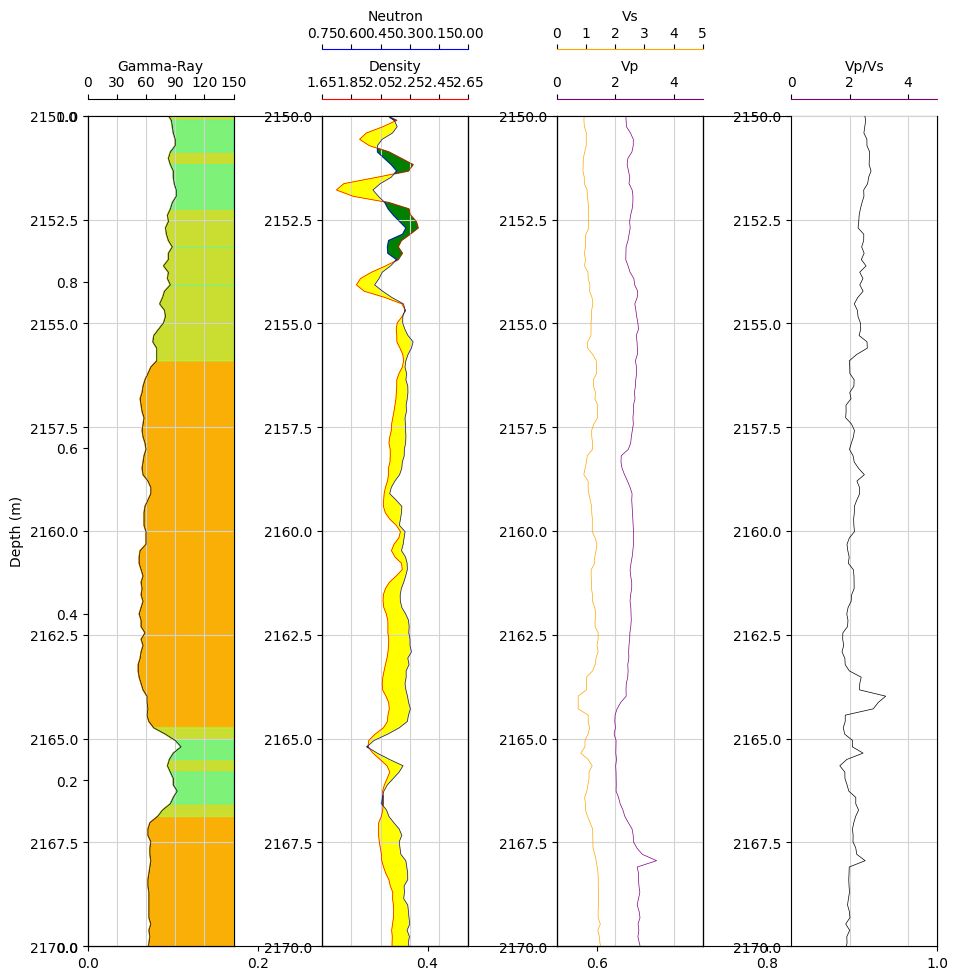

In [7]:
fig, ax = plt.subplots(figsize=(10,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,4), (0,2), rowspan=1, colspan = 1)
ax4 = ax2.twiny() #Twins the y-axis for the density track with the neutron track
ax5 = ax3.twiny()
ax6 = plt.subplot2grid((1,4), (0,3), rowspan=1, colspan = 1)

# As our curve scales will be detached from the top of the track,
# this code adds the top border back in without dealing with splines
ax7 = ax1.twiny()
ax7.xaxis.set_visible(False)
ax8 = ax2.twiny()
ax8.xaxis.set_visible(False)
ax9 = ax3.twiny()
ax9.xaxis.set_visible(False)

# Gamma Ray track
ax1.plot("GR", "DEPTH", data = df, color = "black", linewidth=0.5)
ax1.set_xlabel("Gamma-Ray")
ax1.xaxis.label.set_color("black")
ax1.set_xlim(0, 150)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="black")
ax1.spines["top"].set_edgecolor("black")
ax1.title.set_color('black')
ax1.set_xticks([0, 30, 60, 90, 120, 150])

# Density track
ax2.plot("RHOB", "DEPTH", data = df, color = "red", linewidth=0.5)
ax2.set_xlabel("Density")
ax2.set_xlim(1.65, 2.65)
ax2.xaxis.label.set_color("black")
ax2.tick_params(axis='x', colors="black")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([1.65, 1.85, 2.05, 2.25, 2.45, 2.65])

# Sonic track
ax3.plot("VP", "DEPTH", data = df, color = "purple", linewidth=0.5)
ax3.set_xlabel("Vp")
ax3.set_xlim(0, 5)
ax3.xaxis.label.set_color("black")
ax3.tick_params(axis='x', colors="black")
ax3.spines["top"].set_edgecolor("purple")

# Neutron track placed ontop of density track
ax4.plot("NPHI", "DEPTH", data = df, color = "blue", linewidth=0.5)
ax4.set_xlabel('Neutron')
ax4.xaxis.label.set_color("black")
ax4.set_xlim(0.6, 0.0)
ax4.set_ylim(2170, 2150)
ax4.tick_params(axis='x', colors="black")
ax4.spines["top"].set_position(("axes", 1.08))
ax4.spines["top"].set_visible(True)
ax4.spines["top"].set_edgecolor("blue")
ax4.set_xticks([0.75, 0.6, 0.45, 0.30, 0.15, 0])

# Neutron track placed ontop of density track
ax5.plot("VS", "DEPTH", data = df, color = "orange", linewidth=0.5)
ax5.set_xlabel('Vs')
ax5.xaxis.label.set_color("black")
ax5.set_xlim(0, 5)
ax5.set_ylim(2170, 2150)
ax5.tick_params(axis='x', colors="black")
ax5.spines["top"].set_position(("axes", 1.08))
ax5.spines["top"].set_visible(True)
ax5.spines["top"].set_edgecolor("orange")
ax5.set_xticks([0, 1, 2, 3, 4, 5])

ax6.plot("Vp/Vs", "DEPTH", data = df, color = "black", linewidth=0.5)
ax6.set_xlabel("Vp/Vs")
ax6.set_xlim(0, 5)
ax6.xaxis.label.set_color("black")
ax6.tick_params(axis='x', colors="black")
ax6.spines["top"].set_edgecolor("purple")

x1=df['RHOB']
x2=df['NPHI']

x = np.array(ax2.get_xlim())
z = np.array(ax4.get_xlim())

nz=((x2-np.max(z))/(np.min(z)-np.max(z)))*(np.max(x)-np.min(x))+np.min(x)

ax2.fill_betweenx(df['DEPTH'], x1, nz, where=x1>=nz, interpolate=True, color='green')
ax2.fill_betweenx(df['DEPTH'], x1, nz, where=x1<=nz, interpolate=True, color='yellow')

# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1, ax2, ax3, ax6]:
    ax.set_ylim(2170, 2150)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    
# Variable fill area under Gamma Ray using color gradient
left_col_value = 0
right_col_value = 150

# Assign the column to a variable for easier reading
curve = df['GR']

# Calculate the span of values
span = abs(left_col_value - right_col_value)

# Original colormap
cmap_original = plt.get_cmap('jet')

# Inverted colormap
cmap_inverted = cmap_original.reversed()
# Assign a color map
cmap = cmap_inverted

# Create an array of values to divide up the area under the curve
color_index = np.linspace(left_col_value, right_col_value, 10)

# Loop through each value in the color_index and fill the area
for index in sorted(color_index):
    index_value = (index - left_col_value) / span
    color = cmap(index_value)  # Obtain color for color index value
    ax1.fill_betweenx(df['DEPTH'], curve, right_col_value, where=(curve >= index), color=color, alpha=0.6)

plt.tight_layout()
plt.show()

**FLUID SUBSTITUTION**

In [8]:
df_fs = las.df()

In [9]:
# Tentukan rentang kedalaman yang ingin diambil (misalnya, dari 1000 sampai 2000)
depth_top = 2156.0515
depth_bot = 2163.6716

# Filter DataFrame untuk kedalaman tertentu
df_fs = df_fs[(df_fs.index >= depth_top) & (df_fs.index <= depth_bot)]

**PARAMETER**

In [10]:
K_qtz = 3.7 #GPa
K_gas = 2.7 #GPa
K_brine = 0.002 #GPa

rho_qtz = 2.65
rho_gas = 1.09
rho_brine = 0.1

**Vshale**

In [11]:
GRmax1 = df_fs['GR'].max()
GRmin1 = df_fs['GR'].min()

# Lakukan perhitungan clay content menggunakan .loc untuk menghindari SettingWithCopyWarning
df_fs['Vshale'] = (GRmax1 - df_fs['GR']) / (GRmax1 - GRmin1)

**PHID**

In [12]:
df['DPHI'] = (rho_qtz - df['RHOB'])/(rho_qtz - rho_brine)
df_fs['DPHI'] = (rho_qtz - df_fs['RHOB'])/(rho_qtz - rho_brine)

**Porosity Total**

In [13]:
df['Porosity Total'] = ((df['DPHI'] + df['NPHI'])/2)
df_fs['Porosity Total'] = ((df_fs['DPHI'] + df_fs['NPHI'])/2)

**Porosity Effective**

In [14]:
df['Porosity Eff.'] = df['Porosity Total']*(1-df['Vshale'])
df_fs['Porosity Eff.'] = df_fs['Porosity Total']*(1-df_fs['Vshale'])

**New Vp Vs**

In [15]:
df_fs['M1'] = (df_fs['VP']**2)*(rho_qtz*(1-df_fs['Porosity Eff.'])+(rho_gas*df_fs['Porosity Eff.']))
df_fs['miu_1'] = (df_fs['VS']**2)*(rho_qtz*(1-df_fs['Porosity Eff.'])+(rho_gas*df_fs['Porosity Eff.']))
df_fs['K1'] = df_fs['M1'] - ((4/3)*df_fs['miu_1'])
df_fs['Kdry']=(df_fs['K1']*(1-df_fs['Porosity Eff.'])+df_fs['K1']*K_qtz/K_gas*df_fs['Porosity Eff.']-K_qtz)/(df_fs['K1']/K_qtz+K_qtz/K_gas*df_fs['Porosity Eff.']-1-df_fs['Porosity Eff.'])
df_fs['K2'] = df_fs['Kdry']+((1-(df_fs['Kdry']/K_qtz))**2)/(df_fs['Porosity Eff.']/K_brine+(1-df_fs['Porosity Eff.'])/K_qtz-df_fs['Kdry']/(K_qtz*K_qtz))
df_fs['M2'] = df_fs['K2']+((4/3)*df_fs['miu_1'])
df_fs['VP2']= np.sqrt(df_fs['M2']/((1-df_fs['Porosity Eff.'])*rho_qtz+df_fs['Porosity Eff.']*rho_brine))
df_fs['VS2']= np.sqrt(df_fs['miu_1']/((1-df_fs['Porosity Eff.'])*rho_qtz+df_fs['Porosity Eff.']*rho_brine))
df_fs['VP1/VS1'] = df_fs['VP']/df_fs['VS']
df_fs['VP2/VS2'] = df_fs['VP2']/df_fs['VS2']

**Display Log Setting**

In [16]:
dfDisplay1 = df[(df['DEPTH'] >= 2078.0227) & (df['DEPTH'] <= 2155.8992)]
dfDisplay1.reset_index(inplace=True)
dfDisplay1 = dfDisplay1[['DEPTH', 'Vp/Vs', 'VP', 'VS']]

In [17]:
df_fs.reset_index(inplace=True)
dfDisplayFS = df_fs
dfDisplayFS['Vp/Vs'] = df_fs['VP2/VS2']
dfDisplayFS['VP'] = df_fs['VP2']
dfDisplayFS['VS'] = df_fs['VS2']
dfDisplayFS = dfDisplayFS[['DEPTH', 'Vp/Vs', 'VP', 'VS']]

In [18]:
dfDisplay2 = df[(df['DEPTH'] >= 2163.6716) & (df['DEPTH'] <= 2635.9592)]
dfDisplay2.reset_index(inplace=True)
dfDisplay2 = dfDisplay2[['DEPTH', 'Vp/Vs', 'VP', 'VS']]

In [19]:
df_combined = pd.concat([dfDisplay1, dfDisplayFS, dfDisplay2])

# Mengurutkan DataFrame berdasarkan kedalaman (depth) jika belum terurut
df_combined = df_combined.sort_values(by='DEPTH')

# Reset index agar indexnya rapi
df_combined = df_combined.reset_index(drop=True)

# Interval akhir: 2150.107900 - 2169.919900
# Jika ingin memastikan DataFrame hanya mencakup interval tersebut:
df_combined = df_combined[(df_combined['DEPTH'] >= 2078.0227) & (df_combined['DEPTH'] <= 2636.5688)]

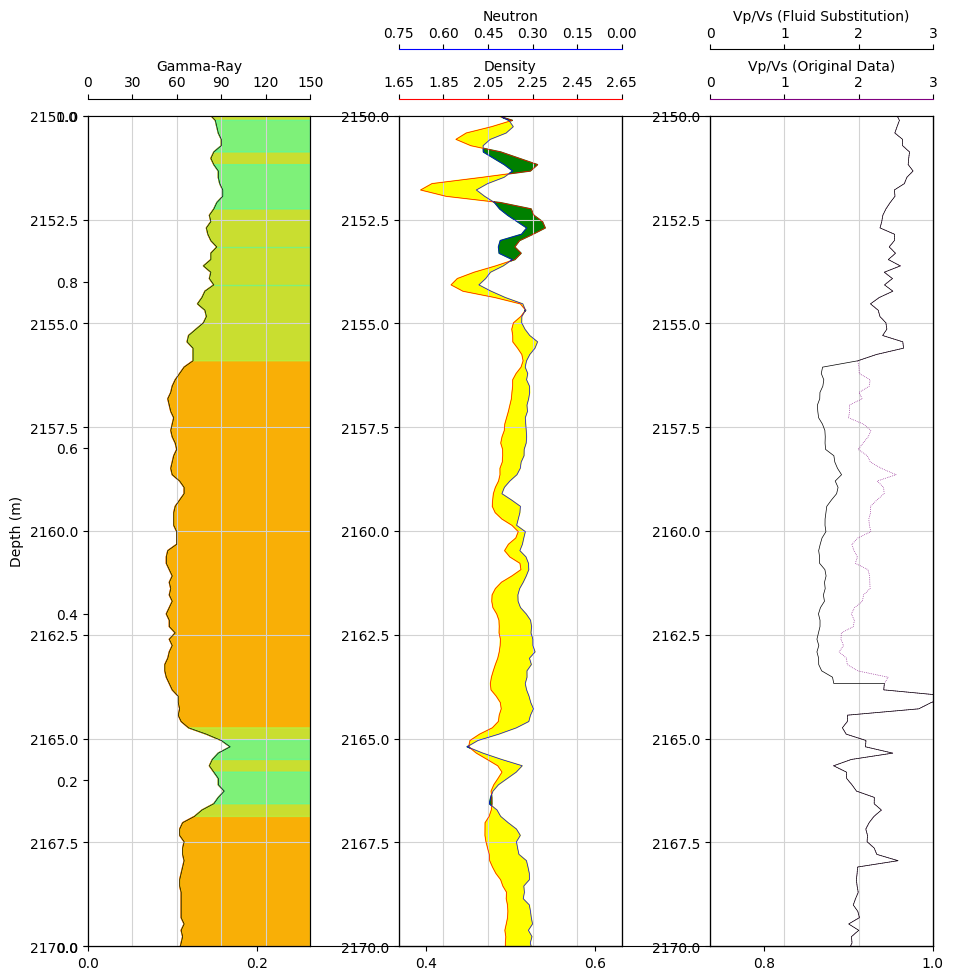

In [20]:
fig, ax = plt.subplots(figsize=(10,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,3), (0,2), rowspan=1, colspan = 1)
ax4 = ax2.twiny() #Twins the y-axis for the density track with the neutron track
ax5 = ax3.twiny()
#ax6 = ax3.twiny()

# As our curve scales will be detached from the top of the track,
# this code adds the top border back in without dealing with splines
ax7 = ax1.twiny()
ax7.xaxis.set_visible(False)
ax8 = ax2.twiny()
ax8.xaxis.set_visible(False)
ax9 = ax3.twiny()
ax9.xaxis.set_visible(False)

# Gamma Ray track
ax1.plot("GR", "DEPTH", data = df, color = "black", linewidth=0.5)
ax1.set_xlabel("Gamma-Ray")
ax1.xaxis.label.set_color("black")
ax1.set_xlim(0, 150)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="black")
ax1.spines["top"].set_edgecolor("black")
ax1.title.set_color('black')
ax1.set_xticks([0, 30, 60, 90, 120, 150])

# Density track
ax2.plot("RHOB", "DEPTH", data = df, color = "red", linewidth=0.5)
ax2.set_xlabel("Density")
ax2.set_xlim(1.65, 2.65)
ax2.xaxis.label.set_color("black")
ax2.tick_params(axis='x', colors="black")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([1.65, 1.85, 2.05, 2.25, 2.45, 2.65])

# Sonic track
ax3.plot("Vp/Vs", "DEPTH", data = df, color = "purple", linewidth=0.5, linestyle=':')
ax3.set_xlabel("Vp/Vs (Original Data)")
ax3.set_xlim(0, 3)
ax3.xaxis.label.set_color("black")
ax3.tick_params(axis='x', colors="black")
ax3.spines["top"].set_edgecolor("purple")

# Neutron track placed ontop of density track
ax4.plot("NPHI", "DEPTH", data = df, color = "blue", linewidth=0.5)
ax4.set_xlabel('Neutron')
ax4.xaxis.label.set_color("black")
ax4.set_xlim(0.6, 0.0)
ax4.set_ylim(2170, 2150)
ax4.tick_params(axis='x', colors="black")
ax4.spines["top"].set_position(("axes", 1.08))
ax4.spines["top"].set_visible(True)
ax4.spines["top"].set_edgecolor("blue")
ax4.set_xticks([0.75, 0.6, 0.45, 0.30, 0.15, 0])

ax5.plot("Vp/Vs", "DEPTH", data = df_combined, color = "black", linewidth=0.5)
ax5.set_xlabel('Vp/Vs (Fluid Substitution)')
ax5.xaxis.label.set_color("black")
ax5.set_xlim(0, 3)
ax5.set_ylim(2170, 2150)
ax5.tick_params(axis='x', colors="black")
ax5.spines["top"].set_position(("axes", 1.08))
ax5.spines["top"].set_visible(True)
ax5.spines["top"].set_edgecolor("black")
ax5.set_xticks([0, 1, 2, 3])

x1=df['RHOB']
x2=df['NPHI']

x = np.array(ax2.get_xlim())
z = np.array(ax4.get_xlim())

nz=((x2-np.max(z))/(np.min(z)-np.max(z)))*(np.max(x)-np.min(x))+np.min(x)

ax2.fill_betweenx(df['DEPTH'], x1, nz, where=x1>=nz, interpolate=True, color='green')
ax2.fill_betweenx(df['DEPTH'], x1, nz, where=x1<=nz, interpolate=True, color='yellow')

# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1, ax2, ax3]:
    ax.set_ylim(2170, 2150)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    
# Variable fill area under Gamma Ray using color gradient
left_col_value = 0
right_col_value = 150

# Assign the column to a variable for easier reading
curve = df['GR']

# Calculate the span of values
span = abs(left_col_value - right_col_value)

# Original colormap
cmap_original = plt.get_cmap('jet')

# Inverted colormap
cmap_inverted = cmap_original.reversed()
# Assign a color map
cmap = cmap_inverted

# Create an array of values to divide up the area under the curve
color_index = np.linspace(left_col_value, right_col_value, 10)

# Loop through each value in the color_index and fill the area
for index in sorted(color_index):
    index_value = (index - left_col_value) / span
    color = cmap(index_value)  # Obtain color for color index value
    ax1.fill_betweenx(df['DEPTH'], curve, right_col_value, where=(curve >= index), color=color, alpha=0.6)

plt.tight_layout() 
plt.show()

**TOTAL DIPLAY LOG**

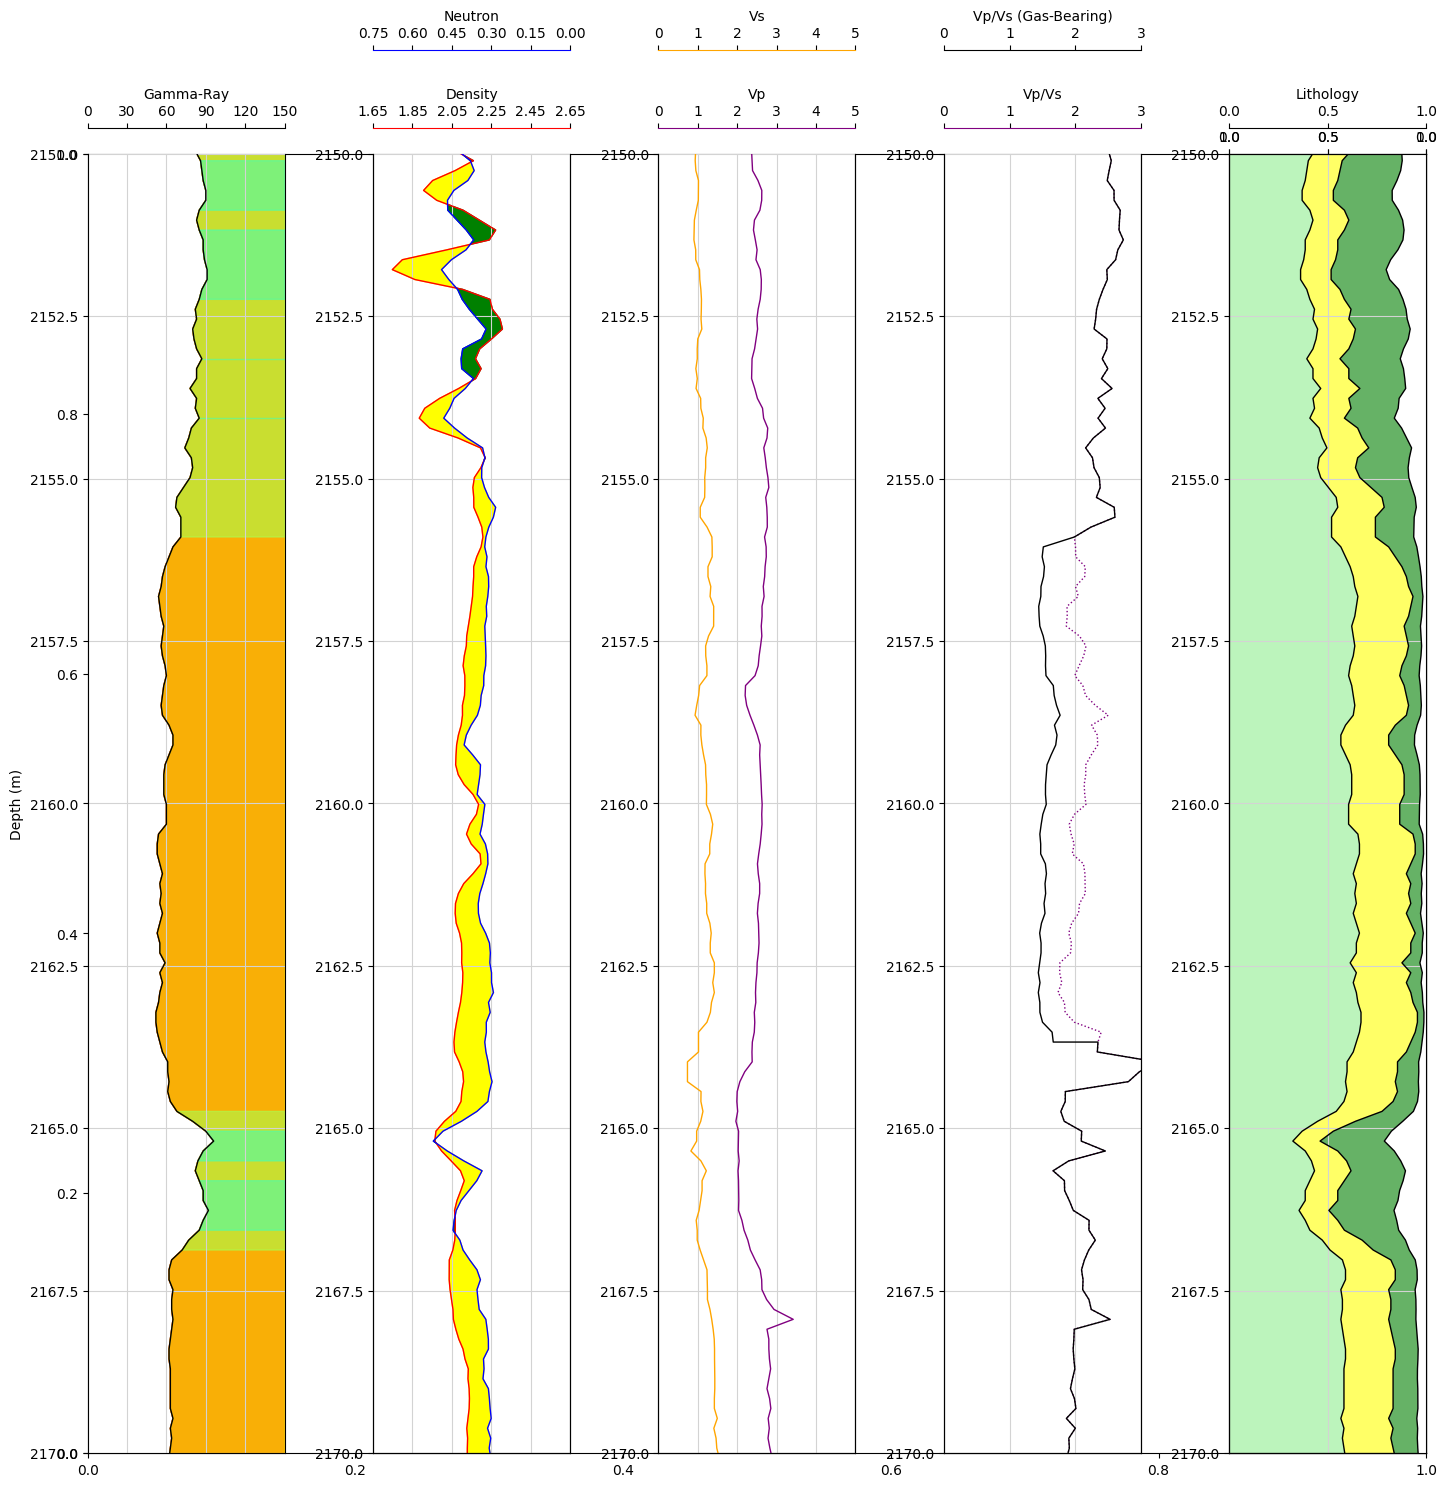

In [21]:
fig, ax = plt.subplots(figsize=(15,15))

#Set up the plot axes
ax1 = plt.subplot2grid((1,5), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,5), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,5), (0,2), rowspan=1, colspan = 1)
ax4 = ax2.twiny() #Twins the y-axis for the density track with the neutron track
ax5 = ax3.twiny()
ax6 = plt.subplot2grid((1,5), (0,3), rowspan=1, colspan = 1)
ax7 = plt.subplot2grid((1,5), (0,4), rowspan=1, colspan = 1)
ax8 = ax6.twiny()
ax9 = ax7.twiny()
ax10 = ax7.twiny()

# Gamma Ray track
ax1.plot("GR", "DEPTH", data = df, color = "black", linewidth=1)
ax1.set_xlabel("Gamma-Ray")
ax1.xaxis.label.set_color("black")
ax1.set_xlim(0, 150)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="black")
ax1.spines["top"].set_edgecolor("black")
ax1.title.set_color('black')
ax1.set_xticks([0, 30, 60, 90, 120, 150])

# Density track
ax2.plot("RHOB", "DEPTH", data = df, color = "red", linewidth=1)
ax2.set_xlabel("Density")
ax2.set_xlim(1.65, 2.65)
ax2.xaxis.label.set_color("black")
ax2.tick_params(axis='x', colors="black")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([1.65, 1.85, 2.05, 2.25, 2.45, 2.65])

# Sonic track
ax3.plot("VP", "DEPTH", data = df, color = "purple", linewidth=1)
ax3.set_xlabel("Vp")
ax3.set_xlim(0, 5)
ax3.xaxis.label.set_color("black")
ax3.tick_params(axis='x', colors="black")
ax3.spines["top"].set_edgecolor("purple")
ax3.set_xticks([0, 1, 2, 3, 4, 5])

# Neutron track placed ontop of density track
ax4.plot("NPHI", "DEPTH", data = df, color = "blue", linewidth=1)
ax4.set_xlabel('Neutron')
ax4.xaxis.label.set_color("black")
ax4.set_xlim(0.6, 0.0)
ax4.tick_params(axis='x', colors="black")
ax4.spines["top"].set_position(("axes", 1.08))
ax4.spines["top"].set_visible(True)
ax4.spines["top"].set_edgecolor("blue")
ax4.set_xticks([0.75, 0.6, 0.45, 0.30, 0.15, 0])

# Neutron track placed ontop of density track
ax5.plot("VS", "DEPTH", data = df, color = "orange", linewidth=1)
ax5.set_xlabel('Vs')
ax5.xaxis.label.set_color("black")
ax5.set_xlim(0, 5)
ax5.tick_params(axis='x', colors="black")
ax5.spines["top"].set_position(("axes", 1.08))
ax5.spines["top"].set_visible(True)
ax5.spines["top"].set_edgecolor("orange")
ax5.set_xticks([0, 1, 2, 3, 4, 5])

ax6.plot("Vp/Vs", "DEPTH", data = df, color = "purple", linewidth=1, linestyle=':')
ax6.set_xlabel("Vp/Vs")
ax6.set_xlim(0, 3)
ax6.tick_params(axis='x', colors="black")
ax6.spines["top"].set_position(("axes", 1.08))
ax6.spines["top"].set_visible(True)
ax6.spines["top"].set_edgecolor("purple")
ax6.set_xticks([0, 1, 2, 3])

ax7.plot("Vshale", "DEPTH", data = df, color = "black", linewidth=1)
ax7.set_xlabel("Lithology")
ax7.set_xlim(0,1)
ax7.set_xticks([0, 0.5, 1])

ax8.plot("Vp/Vs", "DEPTH", data = df_combined, color = "black", linewidth=1)
ax8.set_xlabel('Vp/Vs (Gas-Bearing)')
ax8.xaxis.label.set_color("black")
ax8.set_xlim(0, 3)
ax8.tick_params(axis='x', colors="black")
ax8.spines["top"].set_position(("axes", 1.08))
ax8.spines["top"].set_visible(True)
ax8.spines["top"].set_edgecolor("black")
ax8.set_xticks([0, 1, 2, 3])

ax9.plot('Vclay', "DEPTH", data = df, color = "black", linewidth=1)
ax9.set_xlim(0, 1)
ax9.set_xticks([0,0.5, 1])

ax10.plot('Porosity Eff.', "DEPTH", data = df, color = "black", linewidth=1)
ax10.set_xlim(1 - 0)
ax10.set_xticks([1, 0.5, 0])

x1=df['RHOB']
x2=df['NPHI']

x = np.array(ax2.get_xlim())
z = np.array(ax4.get_xlim())

nz=((x2-np.max(z))/(np.min(z)-np.max(z)))*(np.max(x)-np.min(x))+np.min(x)

ax2.fill_betweenx(df['DEPTH'], x1, nz, where=x1>=nz, interpolate=True, color='green')
ax2.fill_betweenx(df['DEPTH'], x1, nz, where=x1<=nz, interpolate=True, color='yellow')

# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1, ax2, ax3, ax6, ax7]:
    ax.set_ylim(2170, 2150)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    
# Variable fill area under Gamma Ray using color gradient
left_col_value = 0
right_col_value = 150

# Assign the column to a variable for easier reading
curve = df['GR']
curve1 = df['Vclay']
curve2 = df['Vshale']

# Calculate the span of values
span = abs(left_col_value - right_col_value)

# Original colormap
cmap_original = plt.get_cmap('jet')

# Inverted colormap
cmap_inverted = cmap_original.reversed()
# Assign a color map
cmap = cmap_inverted

# Create an array of values to divide up the area under the curve
color_index = np.linspace(left_col_value, right_col_value, 10)

# Loop through each value in the color_index and fill the area
for index in sorted(color_index):
    index_value = (index - left_col_value) / span
    color = cmap(index_value)  # Obtain color for color index value
    ax1.fill_betweenx(df['DEPTH'], curve, right_col_value, where=(curve >= index), color=color, alpha=0.6)

ax7.fill_betweenx(df['DEPTH'], 0, df['Vclay'], facecolor='lightgreen', alpha=0.6, label='0 - Vclay')
ax7.fill_betweenx(df['DEPTH'], df['Vclay'], df['Vshale'], facecolor='yellow', alpha=0.6, label='Vclay - Vshale')
ax7.fill_betweenx(df['DEPTH'], df['Vshale'], 1, facecolor='green', alpha=0.6, label='Vshale - 1.')

ax10.fill_betweenx(df['DEPTH'], 0, df['Porosity Eff.'], facecolor='white', label='Porosity Eff. - 0')

plt.tight_layout() 
plt.show()

**DISPLAY LOG ADWL-2**

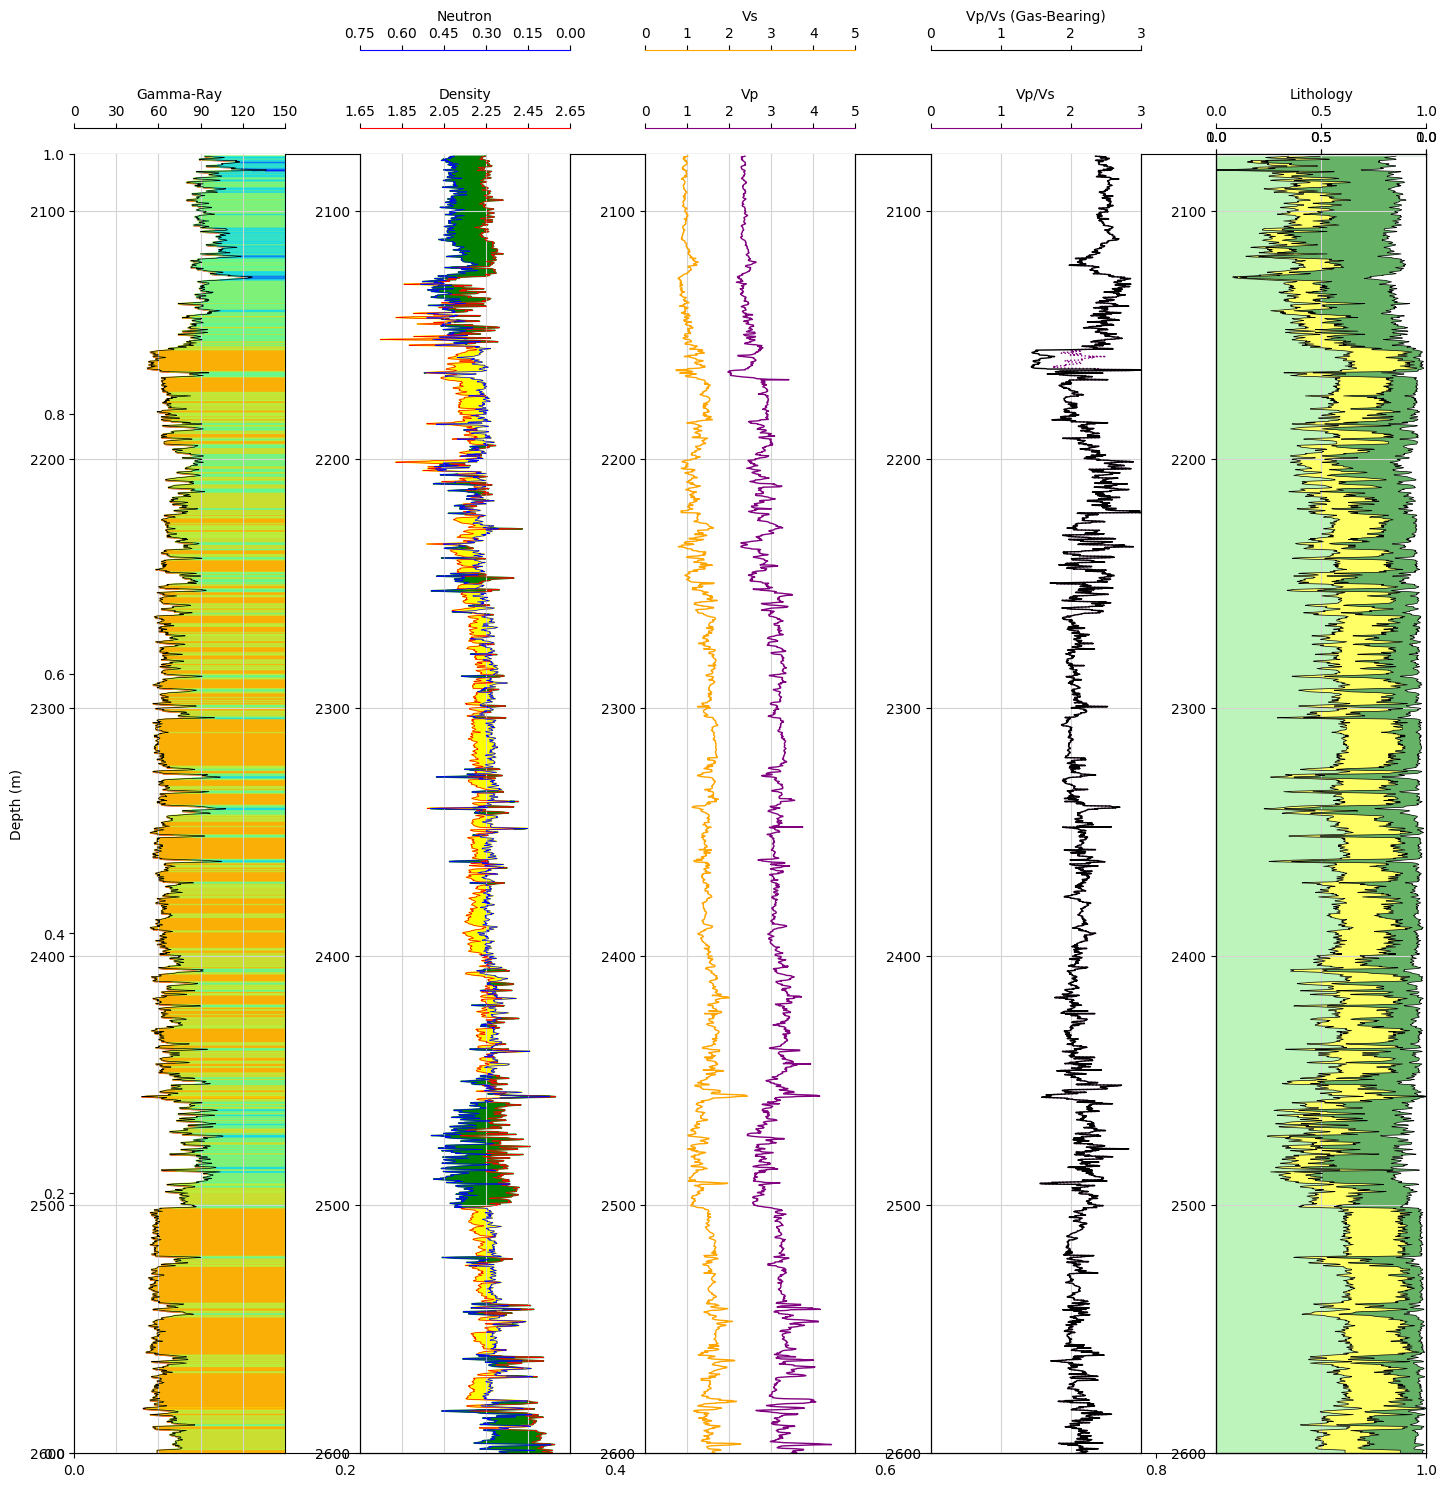

In [30]:
fig, ax = plt.subplots(figsize=(15,15))

#Set up the plot axes
ax1 = plt.subplot2grid((1,5), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,5), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,5), (0,2), rowspan=1, colspan = 1)
ax4 = ax2.twiny() #Twins the y-axis for the density track with the neutron track
ax5 = ax3.twiny()
ax6 = plt.subplot2grid((1,5), (0,3), rowspan=1, colspan = 1)
ax7 = plt.subplot2grid((1,5), (0,4), rowspan=1, colspan = 1)
ax8 = ax6.twiny()
ax9 = ax7.twiny()
ax10 = ax7.twiny()

# Gamma Ray track
ax1.plot("GR", "DEPTH", data = df, color = "black", linewidth=0.5)
ax1.set_xlabel("Gamma-Ray")
ax1.xaxis.label.set_color("black")
ax1.set_xlim(0, 150)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="black")
ax1.spines["top"].set_edgecolor("black")
ax1.title.set_color('black')
ax1.set_xticks([0, 30, 60, 90, 120, 150])

# Density track
ax2.plot("RHOB", "DEPTH", data = df, color = "red", linewidth=0.5)
ax2.set_xlabel("Density")
ax2.set_xlim(1.65, 2.65)
ax2.xaxis.label.set_color("black")
ax2.tick_params(axis='x', colors="black")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([1.65, 1.85, 2.05, 2.25, 2.45, 2.65])

# Sonic track
ax3.plot("VP", "DEPTH", data = df, color = "purple", linewidth=1)
ax3.set_xlabel("Vp")
ax3.set_xlim(0, 5)
ax3.xaxis.label.set_color("black")
ax3.tick_params(axis='x', colors="black")
ax3.spines["top"].set_edgecolor("purple")
ax3.set_xticks([0, 1, 2, 3, 4, 5])

# Neutron track placed ontop of density track
ax4.plot("NPHI", "DEPTH", data = df, color = "blue", linewidth=0.5)
ax4.set_xlabel('Neutron')
ax4.xaxis.label.set_color("black")
ax4.set_xlim(0.6, 0.0)
ax4.tick_params(axis='x', colors="black")
ax4.spines["top"].set_position(("axes", 1.08))
ax4.spines["top"].set_visible(True)
ax4.spines["top"].set_edgecolor("blue")
ax4.set_xticks([0.75, 0.6, 0.45, 0.30, 0.15, 0])

# Neutron track placed ontop of density track
ax5.plot("VS", "DEPTH", data = df, color = "orange", linewidth=1)
ax5.set_xlabel('Vs')
ax5.xaxis.label.set_color("black")
ax5.set_xlim(0, 5)
ax5.tick_params(axis='x', colors="black")
ax5.spines["top"].set_position(("axes", 1.08))
ax5.spines["top"].set_visible(True)
ax5.spines["top"].set_edgecolor("orange")
ax5.set_xticks([0, 1, 2, 3, 4, 5])

ax6.plot("Vp/Vs", "DEPTH", data = df, color = "purple", linewidth=1, linestyle=':')
ax6.set_xlabel("Vp/Vs")
ax6.set_xlim(0, 3)
ax6.tick_params(axis='x', colors="black")
ax6.spines["top"].set_position(("axes", 1.08))
ax6.spines["top"].set_visible(True)
ax6.spines["top"].set_edgecolor("purple")
ax6.set_xticks([0, 1, 2, 3])

ax7.plot("Vshale", "DEPTH", data = df, color = "black", linewidth=0.5)
ax7.set_xlabel("Lithology")
ax7.set_xlim(0,1)
ax7.set_xticks([0, 0.5, 1])

ax8.plot("Vp/Vs", "DEPTH", data = df_combined, color = "black", linewidth=1)
ax8.set_xlabel('Vp/Vs (Gas-Bearing)')
ax8.xaxis.label.set_color("black")
ax8.set_xlim(0, 3)
ax8.tick_params(axis='x', colors="black")
ax8.spines["top"].set_position(("axes", 1.08))
ax8.spines["top"].set_visible(True)
ax8.spines["top"].set_edgecolor("black")
ax8.set_xticks([0, 1, 2, 3])

ax9.plot('Vclay', "DEPTH", data = df, color = "black", linewidth=0.5)
ax9.set_xlim(0, 1)
ax9.set_xticks([0,0.5, 1])

ax10.plot('Porosity Eff.', "DEPTH", data = df, color = "black", linewidth=0.5)
ax10.set_xlim(1 - 0)
ax10.set_xticks([1, 0.5, 0])

x1=df['RHOB']
x2=df['NPHI']

x = np.array(ax2.get_xlim())
z = np.array(ax4.get_xlim())

nz=((x2-np.max(z))/(np.min(z)-np.max(z)))*(np.max(x)-np.min(x))+np.min(x)

ax2.fill_betweenx(df['DEPTH'], x1, nz, where=x1>=nz, interpolate=True, color='green')
ax2.fill_betweenx(df['DEPTH'], x1, nz, where=x1<=nz, interpolate=True, color='yellow')

# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1, ax2, ax3, ax6, ax7]:
    ax.set_ylim(2600, 2077)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    
# Variable fill area under Gamma Ray using color gradient
left_col_value = 0
right_col_value = 150

# Assign the column to a variable for easier reading
curve = df['GR']
curve1 = df['Vclay']
curve2 = df['Vshale']

# Calculate the span of values
span = abs(left_col_value - right_col_value)

# Original colormap
cmap_original = plt.get_cmap('jet')

# Inverted colormap
cmap_inverted = cmap_original.reversed()
# Assign a color map
cmap = cmap_inverted

# Create an array of values to divide up the area under the curve
color_index = np.linspace(left_col_value, right_col_value, 10)

# Loop through each value in the color_index and fill the area
for index in sorted(color_index):
    index_value = (index - left_col_value) / span
    color = cmap(index_value)  # Obtain color for color index value
    ax1.fill_betweenx(df['DEPTH'], curve, right_col_value, where=(curve >= index), color=color, alpha=0.6)

ax7.fill_betweenx(df['DEPTH'], 0, df['Vclay'], facecolor='lightgreen', alpha=0.6, label='0 - Vclay')
ax7.fill_betweenx(df['DEPTH'], df['Vclay'], df['Vshale'], facecolor='yellow', alpha=0.6, label='Vclay - Vshale')
ax7.fill_betweenx(df['DEPTH'], df['Vshale'], 1, facecolor='green', alpha=0.6, label='Vshale - 1.')

ax10.fill_betweenx(df['DEPTH'], 0, df['Porosity Eff.'], facecolor='white', label='Porosity Eff. - 0')

plt.tight_layout() 
plt.show()

**CROSSPLOT**

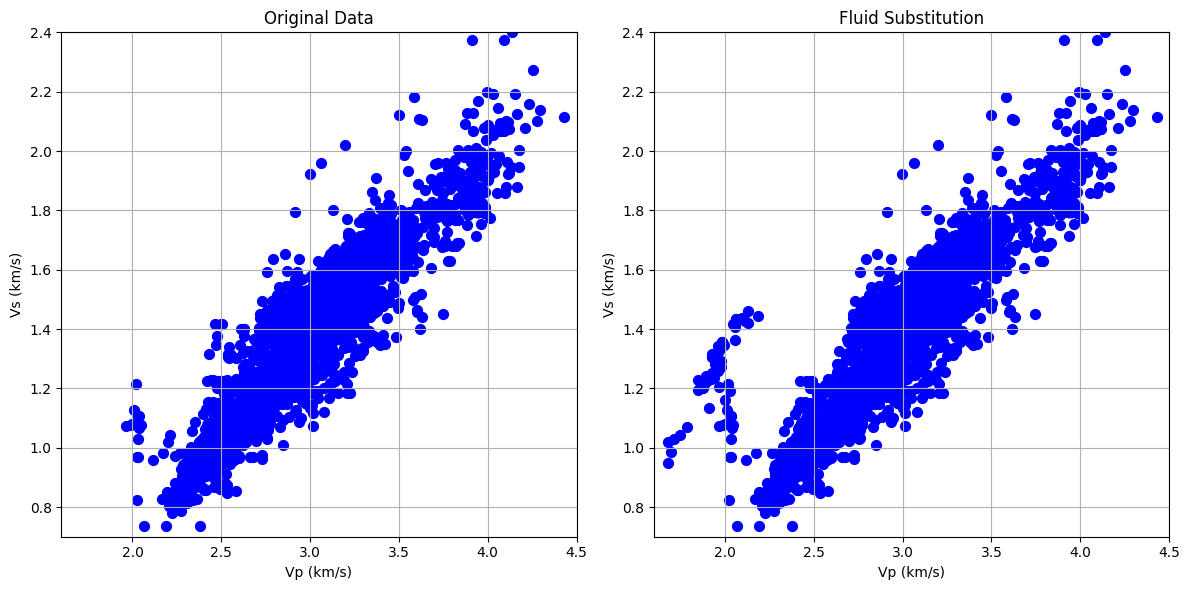

In [23]:
plt.figure(figsize=(12, 6))

# Subplot 1: Original Data
plt.subplot(1, 2, 1)  # Baris 1, Kolom 2, Posisi 1
plt.scatter(df['VP'], df['VS'], color='blue', marker='o', s=50)
plt.xlabel('Vp (km/s)')
plt.ylabel('Vs (km/s)')
plt.title('Original Data')
plt.xlim(1.6, 4.5)
plt.ylim(0.7, 2.4)
plt.grid(True)

# Subplot 2: Fluid Substitution
plt.subplot(1, 2, 2)  # Baris 1, Kolom 2, Posisi 2
plt.scatter(df_combined['VP'], df_combined['VS'], color='blue', marker='o', s=50)
plt.xlabel('Vp (km/s)')
plt.ylabel('Vs (km/s)')
plt.title('Fluid Substitution')
plt.xlim(1.6, 4.5)
plt.ylim(0.7, 2.4)
plt.grid(True)

# Menampilkan plot yang telah dibuat
plt.tight_layout()  # Mengatur tata letak agar tidak saling tumpang tindih
plt.show()